In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

%matplotlib inline

In [ ]:
blob_df = pd.read_csv("blob.csv")
dart_df = pd.read_csv("dart.csv")
outliers_df = pd.read_csv("outliers.csv")
spiral2_df = pd.read_csv("spiral2.csv")
basic2_df = pd.read_csv("basic2.csv")
boxes3_df = pd.read_csv("boxes3.csv")

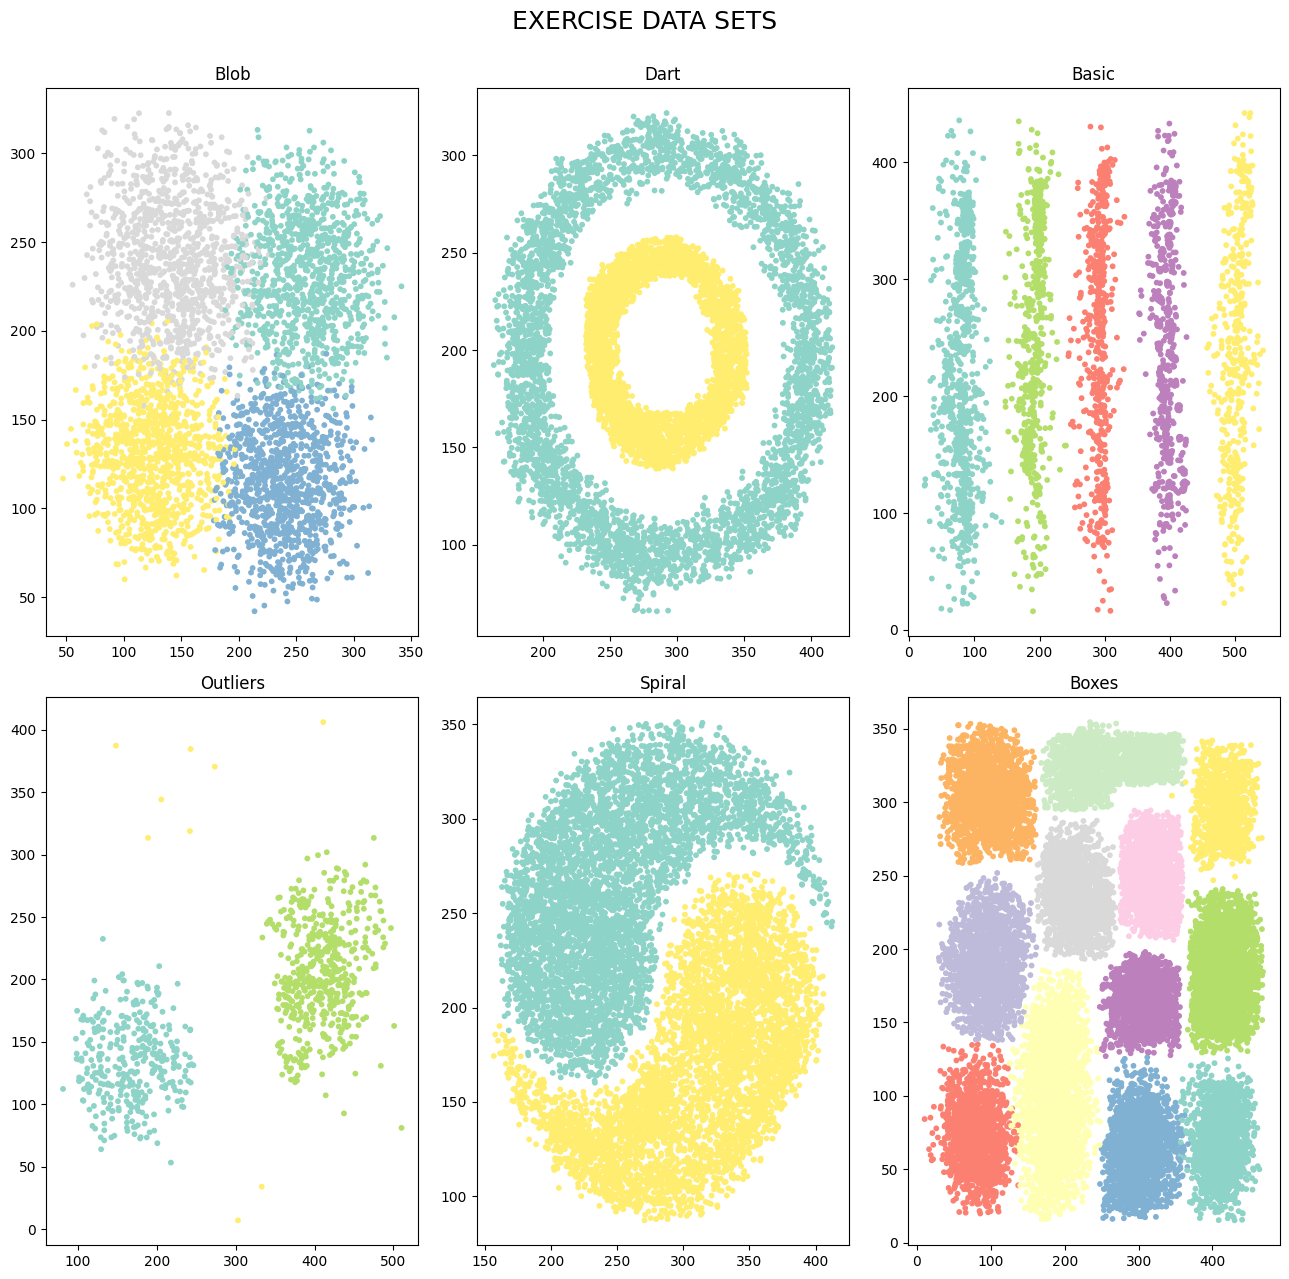

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(13,13))
fig.suptitle('EXERCISE DATA SETS\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Blob");

axes[0,1].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[0,1].set_title("Dart");

axes[0,2].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[0,2].set_title("Basic");

axes[1,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Outliers");

axes[1,1].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[1,1].set_title("Spiral");

axes[1,2].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[1,2].set_title("Boxes");

plt.tight_layout()

In [ ]:
df_blob_kmeans = blob_df.copy()
df_dart_kmeans = dart_df.copy()
df_basic_kmeans = basic2_df.copy()
df_outliers_kmeans = outliers_df.copy()
df_spiral2_kmeans = spiral2_df.copy()
df_boxes3_kmeans = boxes3_df.copy()

In [ ]:
df_blob_kmeans.drop(['color'], axis = 1, inplace =True)
df_dart_kmeans.drop(['color'], axis = 1, inplace =True)
df_basic_kmeans.drop(['color'], axis = 1, inplace =True)
df_outliers_kmeans.drop(['color'], axis = 1, inplace =True)
df_spiral2_kmeans.drop(['color'], axis = 1, inplace =True)
df_boxes3_kmeans.drop(['color'], axis = 1, inplace =True)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
# y_kmeans = kmeans.fit_predict(df_kmeans)

kmeans_blob = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_dart = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_basic = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_outliers = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_spiral2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_boxes3 = KMeans(n_clusters = 12, init = 'k-means++', random_state = 42)

y_kmeans_blob = kmeans_blob.fit_predict(df_blob_kmeans)
y_kmeans_dart = kmeans_dart.fit_predict(df_dart_kmeans)
y_kmeans_basic = kmeans_basic.fit_predict(df_basic_kmeans)
y_kmeans_outliers = kmeans_outliers.fit_predict(df_outliers_kmeans)
y_kmeans_spiral2 = kmeans_spiral2.fit_predict(df_spiral2_kmeans)
y_kmeans_boxes3 = kmeans_boxes3.fit_predict(df_boxes3_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
df_blob_kmeans['Cluster'] = y_kmeans_blob
df_dart_kmeans['Cluster'] = y_kmeans_dart
df_basic_kmeans['Cluster'] = y_kmeans_basic
df_outliers_kmeans['Cluster'] = y_kmeans_outliers
df_spiral2_kmeans['Cluster'] = y_kmeans_spiral2
df_boxes3_kmeans['Cluster'] = y_kmeans_boxes3

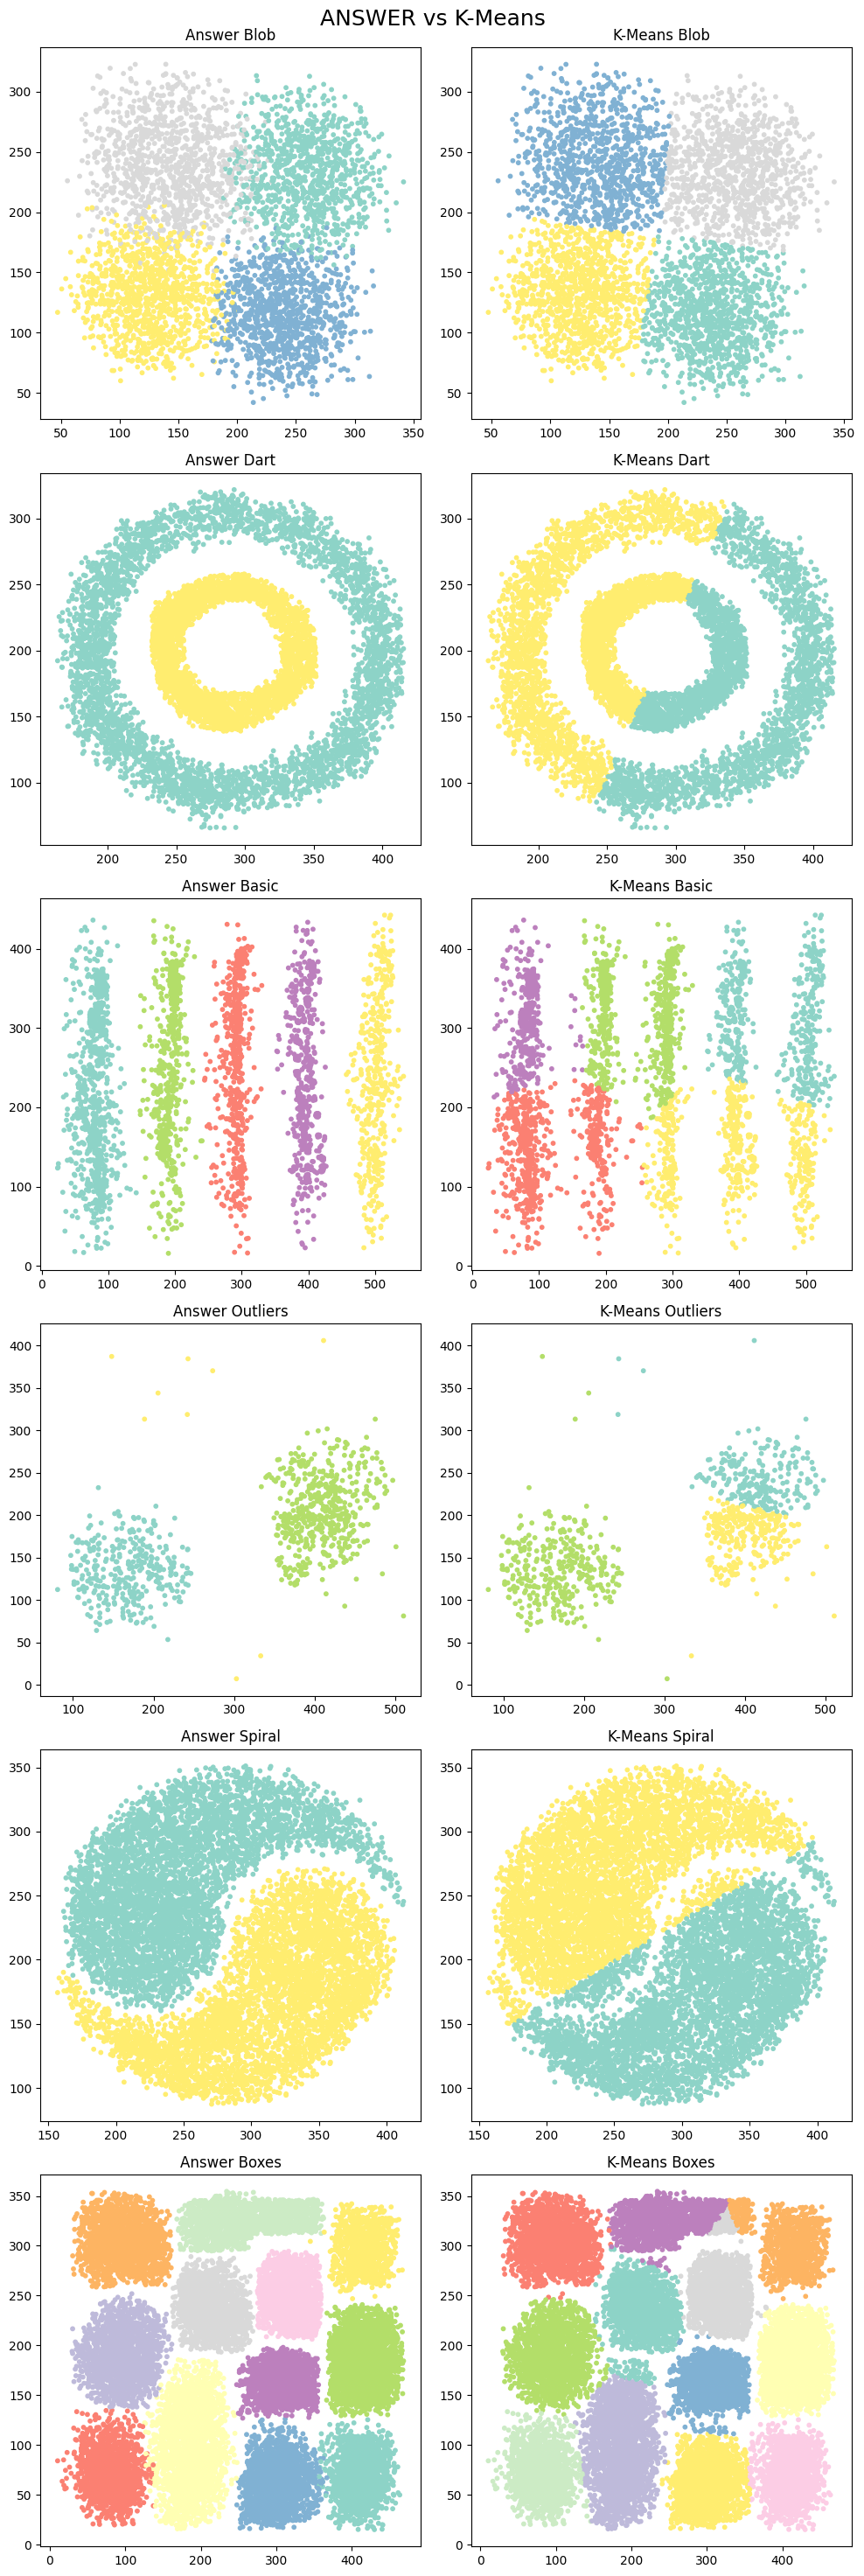

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,30))
fig.suptitle('ANSWER vs K-Means\n', size = 18)

axes[0,0].scatter(blob_df['x'], blob_df['y'], c=blob_df['color'], s=10, cmap = "Set3")
axes[0,0].set_title("Answer Blob");
axes[0,1].scatter(df_blob_kmeans['x'], df_blob_kmeans['y'], c=df_blob_kmeans['Cluster'], s=10, cmap = "Set3")
axes[0,1].set_title("K-Means Blob");


axes[1,0].scatter(dart_df['x'], dart_df['y'], c=dart_df['color'], s=10, cmap = "Set3")
axes[1,0].set_title("Answer Dart");
axes[1,1].scatter(df_dart_kmeans['x'], df_dart_kmeans['y'], c=df_dart_kmeans['Cluster'], s=10, cmap = "Set3")
axes[1,1].set_title("K-Means Dart");

axes[2,0].scatter(basic2_df['x'], basic2_df['y'], c=basic2_df['color'], s=10, cmap = "Set3")
axes[2,0].set_title("Answer Basic");
axes[2,1].scatter(df_basic_kmeans['x'], df_basic_kmeans['y'], c=df_basic_kmeans['Cluster'], s=10, cmap = "Set3")
axes[2,1].set_title("K-Means Basic");

axes[3,0].scatter(outliers_df['x'], outliers_df['y'], c=outliers_df['color'], s=10, cmap = "Set3")
axes[3,0].set_title("Answer Outliers");
axes[3,1].scatter(df_outliers_kmeans['x'], df_outliers_kmeans['y'], c=df_outliers_kmeans['Cluster'], s=10, cmap = "Set3")
axes[3,1].set_title("K-Means Outliers");

axes[4,0].scatter(spiral2_df['x'], spiral2_df['y'], c=spiral2_df['color'], s=10, cmap = "Set3")
axes[4,0].set_title("Answer Spiral");
axes[4,1].scatter(df_spiral2_kmeans['x'], df_spiral2_kmeans['y'], c=df_spiral2_kmeans['Cluster'], s=10, cmap = "Set3")
axes[4,1].set_title("K-Means Spiral");

axes[5,0].scatter(boxes3_df['x'], boxes3_df['y'], c=boxes3_df['color'], s=10, cmap = "Set3")
axes[5,0].set_title("Answer Boxes");
axes[5,1].scatter(df_boxes3_kmeans['x'], df_boxes3_kmeans['y'], c=df_boxes3_kmeans['Cluster'], s=10, cmap = "Set3")
axes[5,1].set_title("K-Means Boxes");

plt.tight_layout()

In [2]:
!pip install scikit-learn-extra
!pip install scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

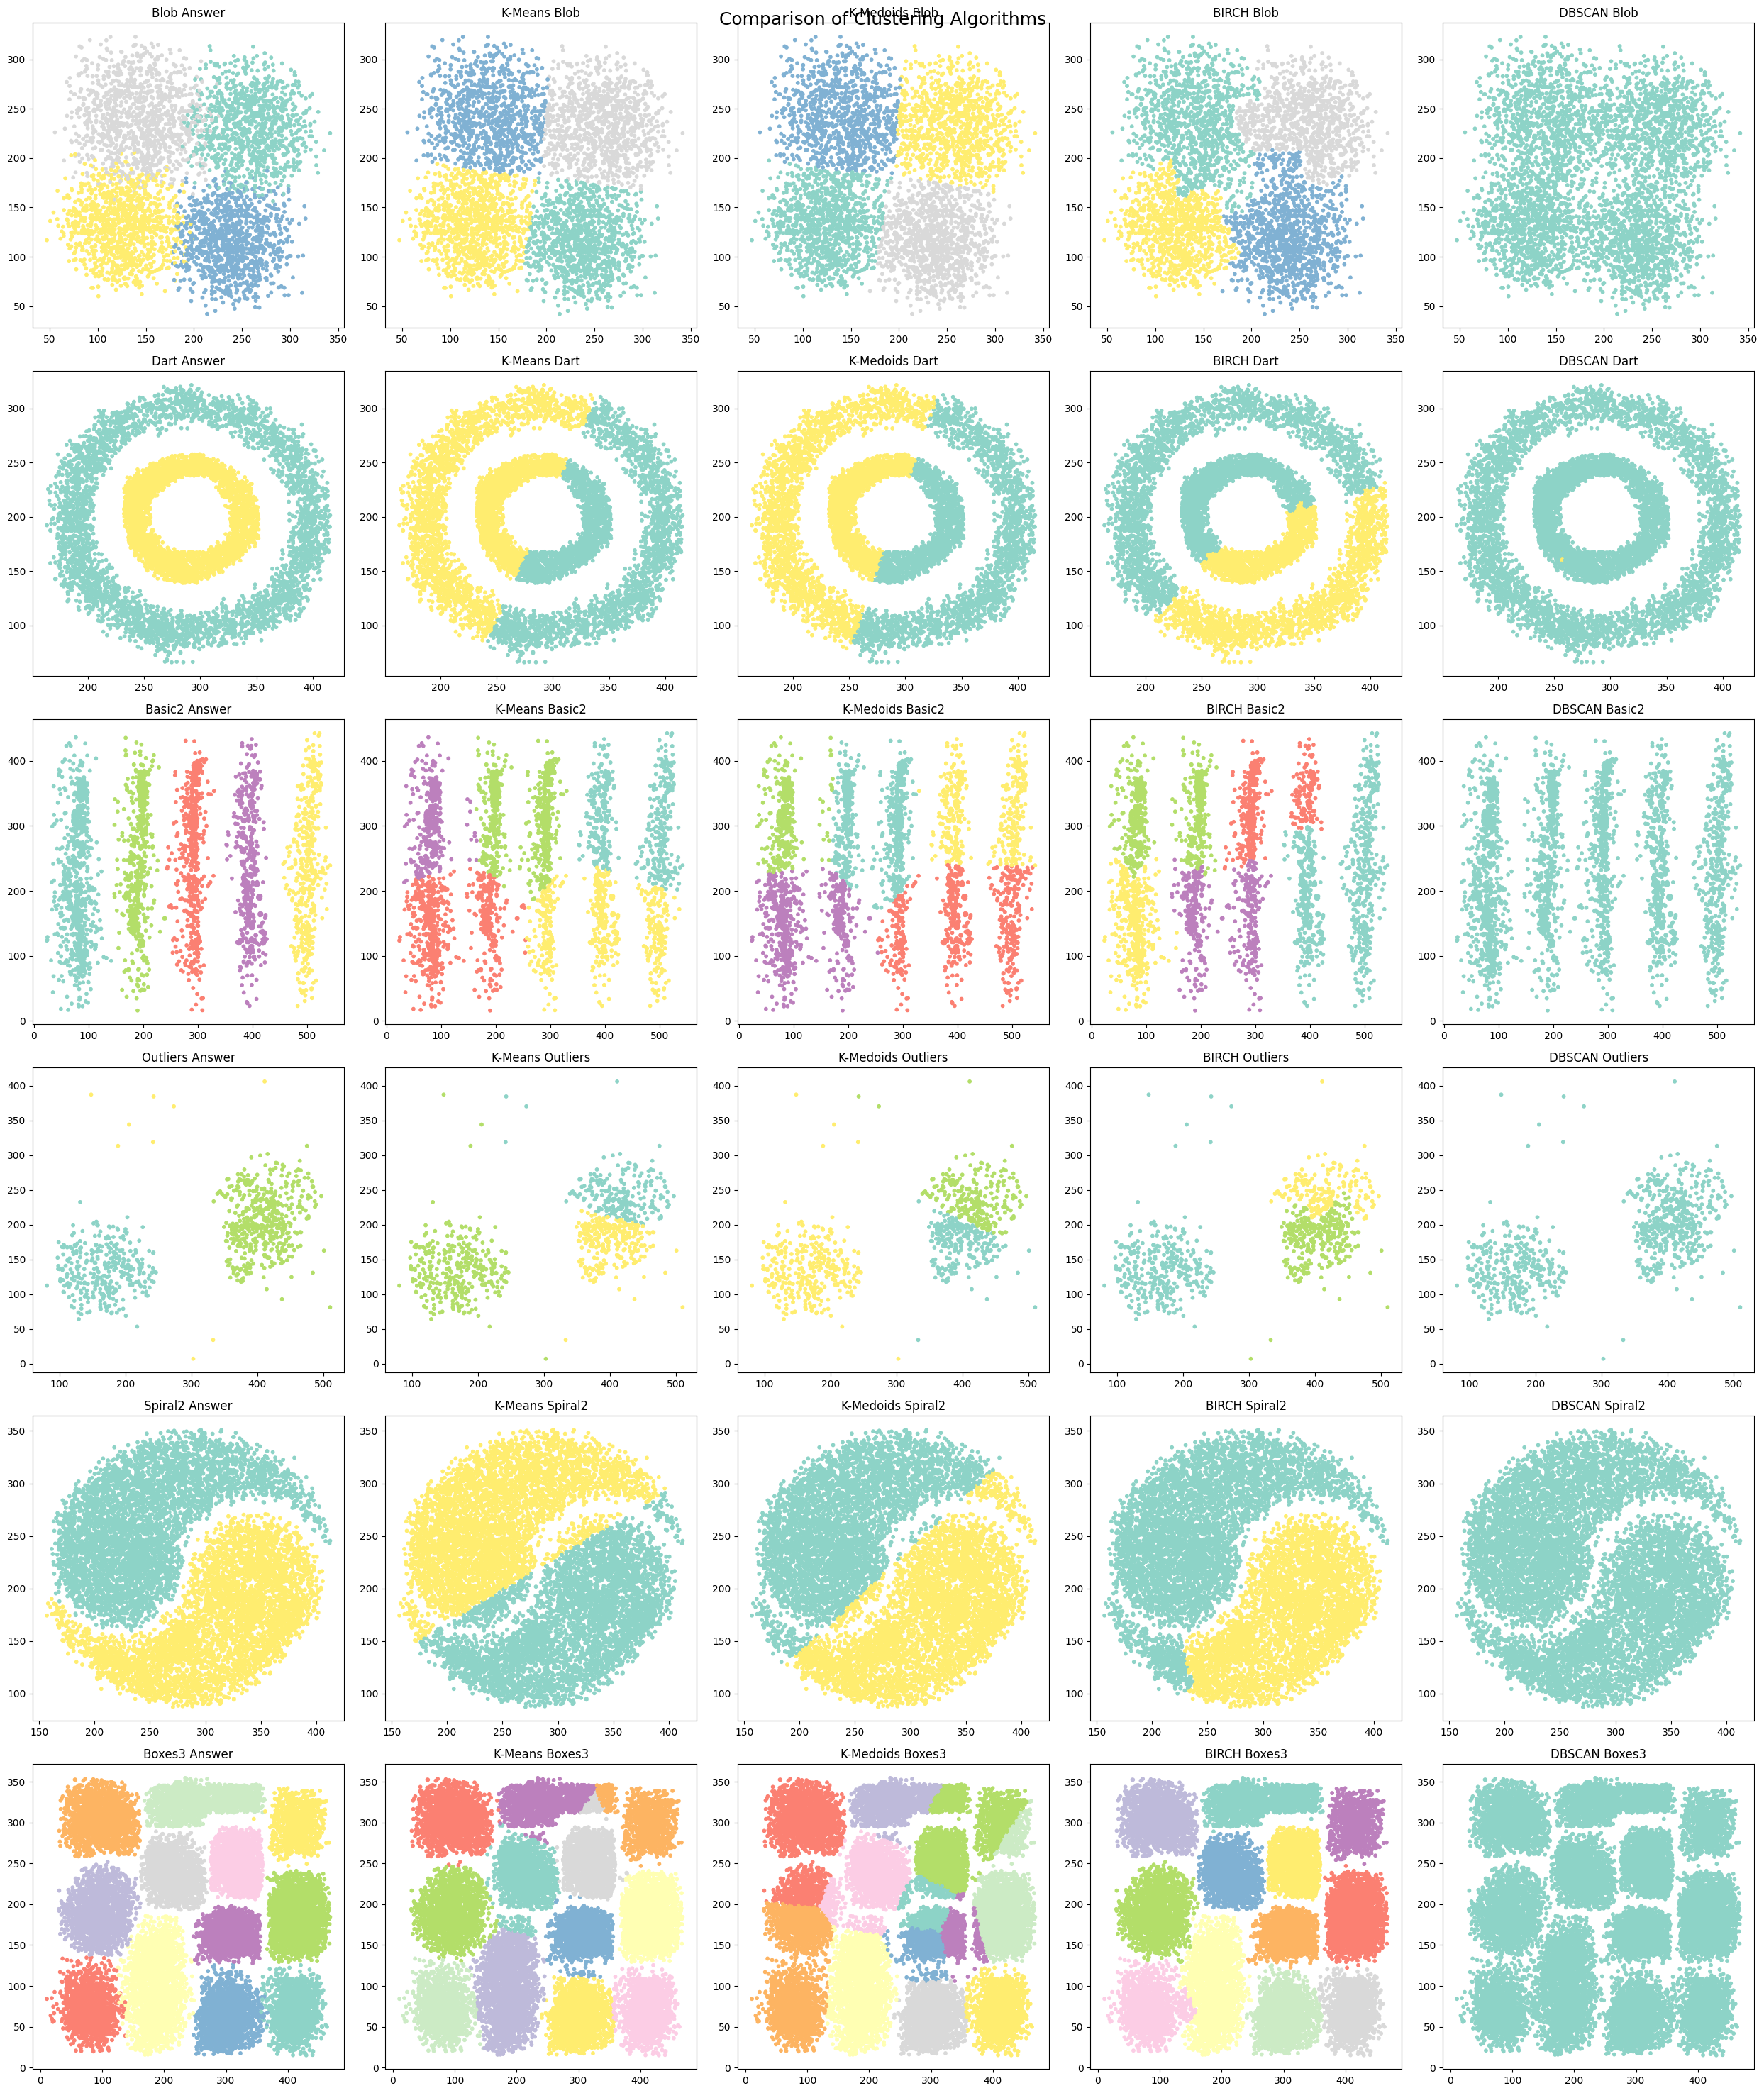

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import Birch, DBSCAN, KMeans

# Load datasets
blob_df = pd.read_csv("blob.csv")
dart_df = pd.read_csv("dart.csv")
outliers_df = pd.read_csv("outliers.csv")
spiral2_df = pd.read_csv("spiral2.csv")
basic2_df = pd.read_csv("basic2.csv")
boxes3_df = pd.read_csv("boxes3.csv")

# Drop the 'color' column from the datasets used for clustering
dfs_nocolor = {
    'blob': blob_df.drop(['color'], axis=1),
    'dart': dart_df.drop(['color'], axis=1),
    'basic2': basic2_df.drop(['color'], axis=1),
    'outliers': outliers_df.drop(['color'], axis=1),
    'spiral2': spiral2_df.drop(['color'], axis=1),
    'boxes3': boxes3_df.drop(['color'], axis=1)
}

# K-Means clustering
kmeans_models = {
    'blob': KMeans(n_clusters=4, init='k-means++', random_state=42),
    'dart': KMeans(n_clusters=2, init='k-means++', random_state=42),
    'basic2': KMeans(n_clusters=5, init='k-means++', random_state=42),
    'outliers': KMeans(n_clusters=3, init='k-means++', random_state=42),
    'spiral2': KMeans(n_clusters=2, init='k-means++', random_state=42),
    'boxes3': KMeans(n_clusters=12, init='k-means++', random_state=42)
}

kmeans_clusters = {name: model.fit_predict(df) for name, df in dfs_nocolor.items() for model_name, model in kmeans_models.items() if name == model_name}

# K-Medoids clustering
def run_kmedoids(df, n_clusters):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    clusters = kmedoids.fit_predict(df)
    return clusters

kmedoids_clusters = {
    'blob': run_kmedoids(dfs_nocolor['blob'], 4),
    'dart': run_kmedoids(dfs_nocolor['dart'], 2),
    'basic2': run_kmedoids(dfs_nocolor['basic2'], 5),
    'outliers': run_kmedoids(dfs_nocolor['outliers'], 3),
    'spiral2': run_kmedoids(dfs_nocolor['spiral2'], 2),
    'boxes3': run_kmedoids(dfs_nocolor['boxes3'], 12)
}

# BIRCH clustering
def run_birch(df, n_clusters):
    birch = Birch(n_clusters=n_clusters)
    clusters = birch.fit_predict(df)
    return clusters

birch_clusters = {
    'blob': run_birch(dfs_nocolor['blob'], 4),
    'dart': run_birch(dfs_nocolor['dart'], 2),
    'basic2': run_birch(dfs_nocolor['basic2'], 5),
    'outliers': run_birch(dfs_nocolor['outliers'], 3),
    'spiral2': run_birch(dfs_nocolor['spiral2'], 2),
    'boxes3': run_birch(dfs_nocolor['boxes3'], 12)
}

# DBSCAN clustering
def run_dbscan(df, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df)
    return clusters

dbscan_clusters = {
    'blob': run_dbscan(dfs_nocolor['blob'], eps=0.5, min_samples=5),
    'dart': run_dbscan(dfs_nocolor['dart'], eps=0.5, min_samples=5),
    'basic2': run_dbscan(dfs_nocolor['basic2'], eps=0.5, min_samples=5),
    'outliers': run_dbscan(dfs_nocolor['outliers'], eps=0.5, min_samples=5),
    'spiral2': run_dbscan(dfs_nocolor['spiral2'], eps=0.5, min_samples=5),
    'boxes3': run_dbscan(dfs_nocolor['boxes3'], eps=0.5, min_samples=5)
}

# Visualization
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25,30))
fig.suptitle('Comparison of Clustering Algorithms', size=18)

datasets = {
    'blob': blob_df,
    'dart': dart_df,
    'basic2': basic2_df,
    'outliers': outliers_df,
    'spiral2': spiral2_df,
    'boxes3': boxes3_df
}

results = {
    'K-Means': kmeans_clusters,
    'K-Medoids': kmedoids_clusters,
    'BIRCH': birch_clusters,
    'DBSCAN': dbscan_clusters
}

algorithms = ['Answer', 'K-Means', 'K-Medoids', 'BIRCH', 'DBSCAN']

for i, (name, original_df) in enumerate(datasets.items()):
    # Plot the original data with the 'color' column
    axes[i, 0].scatter(original_df['x'], original_df['y'], c=original_df['color'], s=10, cmap="Set3")
    axes[i, 0].set_title(f"{name.capitalize()} Answer")

    for j, algo in enumerate(algorithms[1:]):
        axes[i, j+1].scatter(original_df['x'], original_df['y'], c=results[algo][name], s=10, cmap="Set3")
        axes[i, j+1].set_title(f"{algo} {name.capitalize()}")

plt.tight_layout()
plt.show()


In [28]:
def evaluate_kmedoids(df, kmedoids_labels):
    silhouette = silhouette_score(df, kmedoids_labels)
    davies_bouldin = davies_bouldin_score(df, kmedoids_labels)
    calinski_harabasz = calinski_harabasz_score(df, kmedoids_labels)
    return silhouette, davies_bouldin, calinski_harabasz

# Evaluate K-Medoids on each dataset
kmedoids_evaluation_results = {}
for dataset_name, df in dfs_nocolor.items():
    silhouette, davies_bouldin, calinski_harabasz = evaluate_kmedoids(df, kmedoids_clusters[dataset_name])
    kmedoids_evaluation_results[dataset_name] = {'Silhouette Score': silhouette, 'Davies-Bouldin Index': davies_bouldin, 'Calinski-Harabasz Score': calinski_harabasz}

# Print K-Medoids results
for dataset_name, metrics in kmedoids_evaluation_results.items():
    print(f"Performance metrics for K-Medoids on {dataset_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()


Performance metrics for K-Medoids on blob:
Silhouette Score: 0.47193791229721244
Davies-Bouldin Index: 0.6879600047809136
Calinski-Harabasz Score: 5084.9012770128875

Performance metrics for K-Medoids on dart:
Silhouette Score: 0.35736096127399924
Davies-Bouldin Index: 1.1527789106834603
Calinski-Harabasz Score: 4391.255632870366

Performance metrics for K-Medoids on basic2:
Silhouette Score: 0.4107423053125408
Davies-Bouldin Index: 0.7920400350933534
Calinski-Harabasz Score: 3584.0733251934757

Performance metrics for K-Medoids on outliers:
Silhouette Score: 0.4977332134737001
Davies-Bouldin Index: 0.8325866867283169
Calinski-Harabasz Score: 2963.494216844197

Performance metrics for K-Medoids on spiral2:
Silhouette Score: 0.39145981870554536
Davies-Bouldin Index: 1.0917525166194302
Calinski-Harabasz Score: 6393.08669469194

Performance metrics for K-Medoids on boxes3:
Silhouette Score: 0.41188433632845384
Davies-Bouldin Index: 0.7810913351629648
Calinski-Harabasz Score: 21721.4771745

In [31]:
def evaluate_birch(df, birch_labels):
    silhouette = silhouette_score(df, birch_labels)
    davies_bouldin = davies_bouldin_score(df, birch_labels)
    calinski_harabasz = calinski_harabasz_score(df, birch_labels)
    return silhouette, davies_bouldin, calinski_harabasz

# Evaluate Birch on each dataset
birch_evaluation_results = {}
for dataset_name, df in dfs_nocolor.items():
    silhouette, davies_bouldin, calinski_harabasz = evaluate_birch(df, birch_clusters[dataset_name])
    birch_evaluation_results[dataset_name] = {'Silhouette Score': silhouette, 'Davies-Bouldin Index': davies_bouldin, 'Calinski-Harabasz Score': calinski_harabasz}

# Print Birch results
for dataset_name, metrics in birch_evaluation_results.items():
    print(f"Performance metrics for Birch on {dataset_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()


Performance metrics for Birch on blob:
Silhouette Score: 0.4431485298617738
Davies-Bouldin Index: 0.7154149642692663
Calinski-Harabasz Score: 4573.90730479403

Performance metrics for Birch on dart:
Silhouette Score: 0.3329705597709027
Davies-Bouldin Index: 1.205829205346601
Calinski-Harabasz Score: 3811.3500156101913

Performance metrics for Birch on basic2:
Silhouette Score: 0.39280242128582177
Davies-Bouldin Index: 0.824187929047174
Calinski-Harabasz Score: 3227.585822105107

Performance metrics for Birch on outliers:
Silhouette Score: 0.48563844996373634
Davies-Bouldin Index: 0.8645953570268435
Calinski-Harabasz Score: 2786.754435597082

Performance metrics for Birch on spiral2:
Silhouette Score: 0.37152822023904647
Davies-Bouldin Index: 1.1290536339047768
Calinski-Harabasz Score: 5658.794913216582

Performance metrics for Birch on boxes3:
Silhouette Score: 0.536174454378757
Davies-Bouldin Index: 0.5975134919331763
Calinski-Harabasz Score: 34816.29822712345



In [ ]:
def evaluate_dbscan(df, dbscan_labels):
    # Exclude noise points (-1) from evaluation
    valid_labels = dbscan_labels[dbscan_labels != -1]
    # Check if there are at least two clusters for silhouette score calculation
    if len(np.unique(valid_labels)) < 2:
        # If there is only one cluster (or no cluster), return a silhouette score of 0
        silhouette = 0
    else:
        silhouette = silhouette_score(df, valid_labels)
    return silhouette

# Evaluate DBSCAN on each dataset
dbscan_evaluation_results = {}
for dataset_name, df in dfs_nocolor.items():
    silhouette = evaluate_dbscan(df, dbscan_clusters[dataset_name])
    dbscan_evaluation_results[dataset_name] = {'Silhouette Score': silhouette}

# Print DBSCAN results
for dataset_name, metrics in dbscan_evaluation_results.items():
    print(f"Performance metrics for DBSCAN on {dataset_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()


In [27]:
# Evaluation function
def evaluate_kmeans(df, kmeans_labels):
    silhouette = silhouette_score(df, kmeans_labels)
    davies_bouldin = davies_bouldin_score(df, kmeans_labels)
    calinski_harabasz = calinski_harabasz_score(df, kmeans_labels)
    return silhouette, davies_bouldin, calinski_harabasz
# Evaluate K-Means on each dataset
evaluation_results = {}
for dataset_name, df in dfs_nocolor.items():
    silhouette, davies_bouldin, calinski_harabasz = evaluate_kmeans(df, kmeans_clusters[dataset_name])
    evaluation_results[dataset_name] = {'Silhouette Score': silhouette, 'Davies-Bouldin Index': davies_bouldin, 'Calinski-Harabasz Score': calinski_harabasz}

# Print results
for dataset_name, metrics in evaluation_results.items():
    print(f"Performance metrics for {dataset_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()


Performance metrics for blob:
Silhouette Score: 0.47202447847334605
Davies-Bouldin Index: 0.6872011609175611
Calinski-Harabasz Score: 5086.646199399951

Performance metrics for dart:
Silhouette Score: 0.3568691214010831
Davies-Bouldin Index: 1.1540699808494446
Calinski-Harabasz Score: 4391.2149009790555

Performance metrics for basic2:
Silhouette Score: 0.4155239323083408
Davies-Bouldin Index: 0.7954866237107643
Calinski-Harabasz Score: 3641.0965517454865

Performance metrics for outliers:
Silhouette Score: 0.5044426138996638
Davies-Bouldin Index: 0.8330188441325985
Calinski-Harabasz Score: 2981.5725119352833

Performance metrics for spiral2:
Silhouette Score: 0.39087865489431206
Davies-Bouldin Index: 1.0895172048534976
Calinski-Harabasz Score: 6520.882355183909

Performance metrics for boxes3:
Silhouette Score: 0.5417062004973737
Davies-Bouldin Index: 0.5881539772922656
Calinski-Harabasz Score: 36113.61093969269

